In [134]:



from collections import defaultdict
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

import pickle

import seaborn as sns

LABOUR_HASHTAG = '#Labour'
TORY_HASHTAG = '#Tories'

In [6]:
with open('hashtag_tweets', 'rb') as f:
    hashtag_tweets = pickle.load(f)

In [7]:
len(hashtag_tweets[TORY_HASHTAG])



2000

In [8]:
hashtag_tweets.keys()

dict_keys(['#Labour', '#Tories'])

In [9]:
hashtag_tweets[LABOUR_HASHTAG][1]

Status(_json={'created_at': 'Tue Jul 11 08:43:53 +0000 2017', 'id': 884694722220097536, 'id_str': '884694722220097536', 'text': "@YvetteCooperMP Just give them the #Labour manifesto. It'll be like May is copying someone else's homework at school.", 'truncated': False, 'entities': {'hashtags': [{'text': 'Labour', 'indices': [35, 42]}], 'symbols': [], 'user_mentions': [{'screen_name': 'YvetteCooperMP', 'name': 'Yvette Cooper', 'id': 328634628, 'id_str': '328634628', 'indices': [0, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 884186651517386753, 'in_reply_to_status_id_str': '884186651517386753', 'in_reply_to_user_id': 328634628, 'in_reply_to_user_id_str': '328634628', 'in_reply_to_screen_name': 'YvetteCooperMP', 'user': {'id': 362993243, 'id_str': '362993243', 'name': 'David Hodges', 'screen_name': 'DavidHodges71', 'location': 'R

In [10]:
#result = hashtag_tweets['#Corbyn'][0]
#result._json

In [11]:
#result = hashtag_tweets['#May'][1]
#result._json.keys()

In [12]:
#result = hashtag_tweets['#May'][4]
#result._json['user']


In [13]:
raw_data_L = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[LABOUR_HASHTAG]:
    raw_data_L['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_L['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_L['user'].append(tweet._json['user']['name'])
    raw_data_L['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_L['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_L['text'].append(tweet._json['text'])
    


# index=['User {0}'.format(i) for i in range(1000)])

In [14]:
raw_data_T = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[TORY_HASHTAG]:
    raw_data_T['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_T['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_T['user'].append(tweet._json['user']['name'])
    raw_data_T['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_T['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_T['text'].append(tweet._json['text'])

In [15]:
labour_df = pd.DataFrame(raw_data_L, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 

In [16]:
tories_df = pd.DataFrame(raw_data_T, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 


In [17]:
tories_df.head()

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,BrandedWhistleblower,2046,2692,RT @Far_Right_Watch: #Tories Theresa May will ...,0,3
1,Theresa 🌹,992,301,RT @robabdul: Tory Government is the failed ar...,0,87
2,Vegan For Life❀,3440,1914,@5WrightStuff Just like #Corbyn voted with #To...,0,0
3,ReclaimDemocracy,2137,1848,RT @Far_Right_Watch: #Tories Theresa May will ...,0,3
4,Simon,457,324,It's almost as if the #Tories are scared of a ...,0,0


In [18]:
labour_df.head() 

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,Bénédicte Niel,233,448,RT @AFD_en: What is the the effect of siblings...,0,8
1,David Hodges,68,195,@YvetteCooperMP Just give them the #Labour man...,0,0
2,Jay Turner 🇬🇧 🇮🇱,336,868,#Labour plot to oust The #QUEEN: MPs plan to a...,0,0
3,rodney stewart adams,7300,6448,@5WrightStuff we want #labourmanifesto NOT you...,0,0
4,londonyc,749,738,RT @sonofr: If #Labour vote for the Tory great...,0,8


In [19]:
tories_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
1591,Michael,71,530,RT @Harryslaststand: Nothing quite says entitl...,0,954
1557,Lorna Green,144,601,RT @Harryslaststand: Nothing quite says entitl...,0,954
1649,Jon.lambe81@gmail.co,364,215,RT @Harryslaststand: Nothing quite says entitl...,0,954
1587,Mary Anslow,211,436,RT @Harryslaststand: Nothing quite says entitl...,0,954
1650,Fra,196,272,RT @Harryslaststand: Nothing quite says entitl...,0,954
1584,ToyShark,115,303,RT @Harryslaststand: Nothing quite says entitl...,0,954
1583,Stuart ingham,140,655,RT @Harryslaststand: Nothing quite says entitl...,0,954
1651,Bill Deakin,152,207,RT @Harryslaststand: Nothing quite says entitl...,0,954
1652,Pauline Grice,1302,2200,RT @Harryslaststand: Nothing quite says entitl...,0,954
1575,l•P,547,631,RT @Harryslaststand: Nothing quite says entitl...,0,954


In [20]:
print ('More retweet Of Tories ++ ' + tories_df['text'][1055])

More retweet Of Tories ++ The latest The Dale Hill Daily! https://t.co/7Bn2JvWfOv Thanks to @spygun #tories #may


In [21]:
labour_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
1724,Michelle Wasson,8,18,RT @KhanUKIP: MPs consider naming VIP #Labour ...,0,1559
344,Rob Abdul,47297,25211,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,501
736,Norman Rees,378,1499,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,501
1039,Nicky Kaler-Abdul,2137,2089,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,501
336,Lauda Finem,1553,1170,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,501
340,Michael Liddle,257,324,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,501
456,David Gregory,95,256,"RT @JerryHicksUnite: ""I did not vote for Jerem...",0,398
275,TheJackal,55,143,RT @tony_nog: #Labour #Brexit\nThread\n1) I kn...,0,394
356,Maddison Bentley,6,1,RT @oliverjwestwood: @LabourEoin I'm voting #L...,0,339
1433,Midlands Mum,4343,4945,RT @BritishGovWatch: A fact often lost to hist...,0,272


In [22]:
print ('More retweet Of Labour ++ ' + labour_df['text'][230])

More retweet Of Labour ++ RT @vincecable: .@TheresaMayPM overtures to #Labour . A very British German-style Grand Coalition to promote hard #Brexit . Time for a rose…


In [23]:
labour_df.sort_values('favorite_count', ascending=False)



,user,followers_count,friends_count,text,favorite_count,retweet_count
1425,Gareth Morgan,1230,3630,Correct me if i am wrong but..... this appears...,371,166
759,Harry Leslie Smith,98590,8131,Theresa May won't survive as PM past conferenc...,175,60
602,Vince Cable,86661,3614,.@TheresaMayPM overtures to #Labour . A very B...,122,78
377,Grant Robertson,22772,829,Damn right we are. Now is not the time for tax...,55,25
278,BluKIP Nonsense ❄,18791,18251,Theresa May’s first year was awful. Her next p...,33,44
1115,Jerry Hicks,3700,4087,#Corbyn answers #TheresaMay's cry for help by ...,33,32
1194,Life/Political Polls,11127,12024,Who would you rather like to see as Prime Mini...,33,154
549,Keith,1559,940,Sanctimoneous little prick. Get ur own house i...,24,4
574,Harry Leslie Smith,98590,8131,‘Harry's Last Stand Episode 2 The brutal short...,20,14
1645,EmmainEU🇪🇺❄️,2254,2633,#Leave campaign starts to go into meltdown ove...,17,13


In [24]:
print ('More favorite tweet Of Labour ++ ' + labour_df['text'][1192])



More favorite tweet Of Labour ++ RT @jurygroup: Who would you rather like to see as Prime Minister? #snp #conservatives #labour

Please RETWEET Pole!


In [25]:
tories_df.sort_values('favorite_count', ascending=False)




,user,followers_count,friends_count,text,favorite_count,retweet_count
858,Mr Lee Jasper,18408,14215,Nigger is not a word that can be used 'untenti...,195,128
657,Rob Abdul,47297,25211,Tory Government is the failed architect of Aus...,81,87
1534,Mummy Emerita,176,487,Pensions minister admits no letters were sent ...,44,43
965,Far Right Watch,16658,600,"#Tories ReesMogg .. a true ""Man of the People""...",35,25
1340,ANIMAL ADVOCATE Ⓥ,57535,4965,"It's OK #Tories, you can keep on bribing the m...",32,12
888,Nicholas Morris,1129,5001,Let the left know your a proud @Conservatives ...,24,14
1304,Far Right Watch,16658,600,Theresa May to 'relaunch' her #Tories Policies...,23,16
996,Far Right Watch,16658,600,"#Tories: ""Financial Transparency to track Terr...",20,20
883,Nicholas Morris,1129,5001,Let the left know your a proud @Conservatives ...,18,10
93,Stand Up To Racism,18016,15865,If #TheresaMay is at all serious Murray should...,16,20


In [26]:
print ('More favorite tweet Of Tories ++ ' + tories_df['text'][462])

More favorite tweet Of Tories ++ It beggars belief that an organisation with the competence level of #HMRC is allowed such sweeping powers in the UK… https://t.co/OL4fE5Aoc2


In [27]:
print (tories_df['followers_count'].mean())
print (tories_df['friends_count'].mean())
print (tories_df['favorite_count'].mean())
print (tories_df['retweet_count'].mean())


8023.4805
1866.3045
0.6935
71.558


In [28]:
print (labour_df['followers_count'].mean())
print (labour_df['friends_count'].mean())
print (labour_df['favorite_count'].mean())
print (labour_df['retweet_count'].mean())



4137.202
1891.116
0.7475
26.2025


In [29]:
#may_df['followers_count'].mean() - Cor_df['followers_count'].mean()

In [30]:
#may_df['favorite_count'].mean() - Cor_df['favorite_count'].mean()

In [31]:
#Cor_df['retweet_count'].quantile([.25, .5, .75])

In [32]:
#may_df['retweet_count'].quantile([.25, .5, .75])

In [33]:
#surveys_by_sex_df = surveys_df.groupby('sex')
#surveys_by_sex_df

In [34]:
#surveys_by_sex_df['hindfoot_length'].describe()

In [35]:
text_tories = ""
for text in tories_df['text']:
    text_tories += " " + text

text_tories = text_tories.lower()

In [36]:
text_labour = ""
for text in labour_df['text']:
    text_labour += " " + text

text_labour = text_labour.lower()

In [37]:
#wordcloud = WordCloud().generate(text_con)

In [38]:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')

In [39]:
#plt.show()

In [40]:
my_list_labour = text_labour.split()


counter = Counter(my_list_labour)
print(counter)


Counter({'#labour': 1703, 'rt': 1033, 'to': 923, 'the': 777, 'a': 569, 'of': 409, 'for': 388, 'in': 372, 'is': 356, 'as': 313, 'you': 299, '#conservatives': 251, 'on': 246, '#corbyn': 234, '#snp': 231, 'and': 224, '#brexit': 211, 'would': 207, 'like': 196, 'theresa': 194, 'who': 193, '&amp;': 191, 'see': 175, 'may': 166, 'please': 164, '.': 162, 'rather': 160, 'prime': 155, 'retweet': 153, 'minister?': 152, 'pole!': 152, '@jurygroup:': 151, 'it': 149, 'be': 137, 'not': 130, '#jeremycorbyn': 126, 'this': 120, 'all': 118, 'she': 118, 'with': 116, 'i': 115, 'via': 113, 'by': 112, '-': 110, "#labour's": 109, 'that': 106, 'very': 104, 'was': 104, '#tory': 103, 'hard': 102, 'her': 102, 'an': 101, 'will': 100, 'if': 98, 'time': 97, '#libdems': 95, 'help': 94, '#theresamay': 93, 'british': 91, 'have': 91, 'their': 88, 'are': 87, 'coalition': 85, '#tories': 84, 'or': 84, 'they': 82, '#ge2017': 81, '#jc4pm': 81, 'overtures': 80, 'grand': 79, '.@theresamaypm': 78, 'german-style': 78, 'promote': 7

In [41]:
my_list_tories = text_tories.split()


counter = Counter(my_list_tories)
print(counter)

Counter({'#tories': 1819, 'the': 1499, 'rt': 1078, 'of': 818, 'to': 739, 'a': 634, 'is': 416, 'for': 383, 'in': 365, 'and': 265, '#brexit': 248, 'are': 244, 'as': 229, 'on': 221, 'have': 215, '&amp;': 211, 'austerity': 201, 'so': 184, '#theresamay': 179, 'with': 169, 'it': 162, '#labour': 161, 'us': 159, 'they': 158, 'you': 151, 'well': 148, 'be': 147, 'will': 145, 'tory': 143, '-': 142, 'best': 141, 'time': 139, "what's": 136, "it's": 134, 'not': 133, 'says': 133, 'about': 132, 'nothing': 125, 'what': 122, 'this': 120, '@far_right_watch:': 119, 'no': 119, 'if': 118, '#dup': 116, '#jc4pm': 114, 'out': 114, 'we': 112, 'quite': 111, 'that': 110, '@harryslaststand:': 110, 'entitlement': 110, 'gilded': 110, 'statue': 110, 'thatcher.': 110, 'https://t.co/wqw…': 110, '#maymustgo': 109, 'from': 109, 'when': 109, 'by': 108, 'corbyn': 105, '@robabdul:': 104, 'their': 103, 'all': 99, 'government': 97, 'do': 93, 'only': 91, 'jeremy': 89, 'failed': 88, 'architect': 88, 'destroys': 88, '#austerityk

In [42]:
with open('stopwords.txt') as f:
    stop_words = []
    for line in f:
        stop_words.append(line.rstrip())

In [105]:
filter_words = {'tory','retweet','#tories','#labour','#conservatives','labour','Labour', 'Tories','tories','https://t.co/xOSOYNwTw4', 'https','rt', 'are', 'on', 'by', 'The', 'if', '&amp;', 'i', 'at', 'has', 'will','your', 'it', 'that', 'not', 'just', 'https:/…', 'achieved', 'one', 'as', "it's", 'do', 'Enough', 'what', ':https://t…', 'message', 'https://t.co/ZDgQnY8lOP'} 

filter_words = filter_words | set(stop_words)
filter_words

{'#conservatives',
 '#labour',
 '#tories',
 '&amp;',
 ':https://t…',
 'Enough',
 'Labour',
 'The',
 'Tories',
 'a',
 'about',
 'above',
 'achieved',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended

In [106]:
filtered_list_labour = []
for word in my_list_labour:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_labour.append(word)
        
print(filtered_list_labour)        


        

['@afd_en:', 'effect', 'siblings', '#niger', 'labor', 'market', 'integration', 'read', 'reseach', 'paper', '►https://t.co/vqrhz9hhxo', '#labour…', '@yvettecoopermp', 'manifesto.', "it'll", 'copying', "else's", 'homework', 'school.', 'plot', 'oust', '#queen:', 'mps', 'plan', 'address', 'conference', 'calling', 'ditch', '#monarchy', '@5wrightstuff', '#labourmanifesto', "may's", '#brexit', 'bs', '#ohjeremycorbyn', '@nusuk', '#cornwall', 'people', '"country"', '@sonofr:', 'vote', 'repeal', 'bill', 'betrayal', 'electorate', 'modern', 'political', 'history!', '#…', '@paulgambles2', '@johnrobgalloway', '@wantenglandback', '@uklabour', 'look', "'lunatics'", "hadn't", 'ma…', '@sonofr:', 'vote', 'repeal', 'bill', 'betrayal', 'electorate', 'modern', 'political', 'history!', '#…', '@sonofr:', 'vote', 'repeal', 'bill', 'betrayal', 'electorate', 'modern', 'political', 'history!', '#…', '@sonofr:', 'vote', 'repeal', 'bill', 'betrayal', 'electorate', 'modern', 'political', 'history!', '#…', '#tory', '

In [107]:
filtered_list_tories = []
for word in my_list_tories:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_tories.append(word)
        
print(filtered_list_tories)        


        

['@far_right_watch:', 'theresa', "'relaunch'", 'policies', 'today.', "here's", '...', '@robabdul:', 'government', 'failed', 'architect', 'austerity', 'jeremy', 'corbyn', 'destroys', '#maymustgo', '#jc4pm', '#austeritykill…', '@5wrightstuff', '#corbyn', 'voted', 'staying', '#eu', 'single', 'market', 'triggering', '#a50…', '@far_right_watch:', 'theresa', "'relaunch'", 'policies', 'today.', "here's", '...', 'scared', 'well-educated', 'population.', 'be?', '#divideandconquer', '@far_right_watch:', 'theresa', "'relaunch'", 'policies', 'today.', "here's", '...', '@richardburgon', '@marionpfallon', '@jeremycorbyn', 'cameron', 'caused', 'mess', 'walked', 'away.', 'c…', 'theresa', "'relaunch'", 'policies', 'today.', "here's", '...', '@leejasper:', '#grenfelltower', 'victims.', "they're", 'fit', 'public', 'life', 'driven', 'politics.', 'htt…', 'anyway,', 'lucky', '#woodpiles.', '#woodpiles', 'called', 'furniture.', '@antiracismday:', '#theresamay', 'serious', 'murray', 'expelled', 'sign', 'petit

In [108]:
from collections import Counter
counter_labour = Counter(filtered_list_labour)

print(counter_labour)



Counter({'#corbyn': 234, '#snp': 231, '#brexit': 211, 'theresa': 194, 'please': 164, 'prime': 155, 'minister?': 152, 'pole!': 152, '@jurygroup:': 151, '#jeremycorbyn': 126, 'via': 113, "#labour's": 109, '#tory': 103, 'hard': 102, 'time': 97, '#libdems': 95, 'help': 94, '#theresamay': 93, 'british': 91, 'coalition': 85, '#ge2017': 81, '#jc4pm': 81, 'overtures': 80, 'grand': 79, '.@theresamaypm': 78, 'german-style': 78, 'promote': 78, '@ukipnfkn:': 78, '@vincecable:': 77, 'rose…': 77, '#wales': 76, 'corbyn': 72, '@jeremycorbyn': 71, "won't": 70, '@harryslaststand:': 68, 'election': 67, 'conference': 66, 'guardian': 66, '#greenparty': 65, '#england': 64, '#scotland': 63, 'mps': 61, 'pm': 60, 'past': 60, 'manifesto': 58, 'dead': 58, '#nhs': 57, 'call': 57, 'season': 57, 'survive': 56, 'water.': 56, 'party': 55, 'people': 54, '...': 54, '#plaidcymru': 53, '#stillyes': 53, 'worse': 52, 'vote': 51, '#ukip': 48, 'may’s': 44, 'awful.': 42, 'promises': 42, 'polly': 42, 'toynbee': 42, '#toriesout

In [120]:
labour_10 = counter_labour.most_common(10)

labour_10



[('#corbyn', 234),
 ('#snp', 231),
 ('#brexit', 211),
 ('theresa', 194),
 ('please', 164),
 ('prime', 155),
 ('minister?', 152),
 ('pole!', 152),
 ('@jurygroup:', 151),
 ('#jeremycorbyn', 126)]

In [110]:
from collections import Counter
counter_tory = Counter(filtered_list_tories)

print(counter_tory)




Counter({'#brexit': 248, 'austerity': 201, '#theresamay': 179, 'time': 139, "what's": 136, '@far_right_watch:': 119, '#dup': 116, '#jc4pm': 114, '@harryslaststand:': 110, 'entitlement': 110, 'gilded': 110, 'statue': 110, 'thatcher.': 110, '#maymustgo': 109, 'corbyn': 105, '@robabdul:': 104, 'government': 97, 'jeremy': 89, 'failed': 88, 'architect': 88, 'destroys': 88, '#austeritykill…': 87, 'hearing': 75, '#…': 70, 'telling': 68, '...': 67, 'pay': 67, "don't": 66, '@mylegalforum:': 66, 'them!': 64, 'sick': 63, 'posh': 63, '#nhs': 62, '#toriesout': 56, 'party': 53, 'brexit': 52, 'minister': 48, 'dup': 46, 'leader': 46, 'sent': 45, '#waspi': 45, 'pensions': 44, 'admits': 44, 'letters': 44, '2009': 44, 'maladministration!': 44, '@happybird_y:': 43, '#tories:': 43, '#annemariemorris': 42, 'theresa': 41, 'deal': 41, 'political': 41, 'track': 40, 'fight': 40, 'uk': 39, 'tax': 39, '#tories.': 38, 'marie': 38, 'economic': 38, 'people': 37, 'so.': 37, 'suicide': 37, '@theresa_may': 37, '#corbyn

In [117]:
tory_10 = counter_tory.most_common(10)
tory_10


[('#brexit', 248),
 ('austerity', 201),
 ('#theresamay', 179),
 ('time', 139),
 ("what's", 136),
 ('@far_right_watch:', 119),
 ('#dup', 116),
 ('#jc4pm', 114),
 ('@harryslaststand:', 110),
 ('entitlement', 110)]

In [99]:
import numpy as np

from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
tory_texts = list(tories_df['text'])

In [50]:
tory_texts[3]

"RT @Far_Right_Watch: #Tories Theresa May will 'relaunch' her Policies today. Here's how it will go ... https://t.co/5MERlEQw3x"

In [51]:
labour_texts = list(labour_df['text'])

In [52]:
labour_texts[1]

"@YvetteCooperMP Just give them the #Labour manifesto. It'll be like May is copying someone else's homework at school."

In [53]:
tory_vocab = []
for word, count in counter_tory.most_common(100):
    tory_vocab.append(word)

labour_vocab = []
for word, count in counter_labour.most_common(100):
    labour_vocab.append(word)
    
vocab = tory_vocab + labour_vocab

vocab = list(set(vocab))
    
count_vectorizer = CountVectorizer(vocabulary=vocab)

In [54]:
td_matrix = count_vectorizer.fit_transform(labour_texts + tory_texts)
y = [LABOUR_HASHTAG] * len(labour_texts) + [TORY_HASHTAG] * len(tory_texts)


In [55]:
count_vectorizer.vocabulary

['tax',
 'hard',
 '..',
 'ideas',
 'hearing',
 'pay',
 'british',
 '#toriesout',
 'own',
 '#jeremycorbyn',
 'voted',
 'promote',
 'marie',
 'public',
 'pensions',
 '@vincecable:',
 '#ukip',
 'money',
 'water.',
 "#theresamay's",
 '@jurygroup:',
 'fight',
 '#corbyn',
 "won't",
 'policy',
 'election',
 'still"',
 '@far_right_watch:',
 'survive',
 'architect',
 'whoever',
 'mps',
 '#nhs',
 'statue',
 'answers',
 'leader',
 '#waspi',
 '#austeritykill…',
 'maladministration!',
 '@lukavega_:',
 'minister?',
 '#…',
 'read',
 '#austerity',
 "don't",
 '#labour',
 '#may',
 'government',
 'call',
 'conference',
 'dup',
 '#forthemany',
 '2009',
 '"better',
 '@graemepearce3',
 '#dup',
 'deal',
 '#theresamay',
 'prime',
 '#labour…',
 'austerity',
 'track',
 'realize',
 '#r4today',
 'telling',
 '#snp',
 'beginning',
 'retweet',
 'please',
 '...',
 'german-style',
 'support',
 'rose…',
 'promises',
 'offering',
 '#skynews',
 '#c4news',
 '#england',
 'past',
 '#nastyparty',
 'pm',
 '@annemariemorris',


In [56]:
svc = LinearSVC()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.5, random_state=0)

In [78]:
svc.fit_transform(X_train, y_train)

/Users/MacBook3/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<2000x60 sparse matrix of type '<class 'numpy.int64'>'
	with 2703 stored elements in Compressed Sparse Column format>

In [79]:
y_pred = svc.predict(X_test)

[[614 415]
 [133 838]]


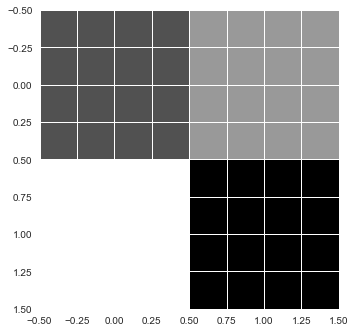

0.726


In [200]:
conf = confusion_matrix(y_test, y_pred, labels=[LABOUR_HASHTAG, TORY_HASHTAG])
print(confusion_matrix(y_test, y_pred, labels=[LABOUR_HASHTAG, TORY_HASHTAG]))
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print(np.mean(y_test == y_pred))

In [63]:
words_importances = list(zip(list(count_vectorizer.vocabulary), svc.coef_.tolist()[0]))

In [64]:
words_importances.sort(key=lambda x:x[1], reverse=True)

In [65]:
words_importances[:50]

[('architect', 1.5499569398950264),
 ('destroys', 1.5499569398950264),
 ('themselves', 1.2006632148835437),
 ('fight', 1.0683357209075928),
 ('dup', 0.7904587148262663),
 ('promises', 0.6909466671870367),
 ('deal', 0.6015983169101166),
 ('admits', 0.6007768277946954),
 ('sent', 0.6007768277946954),
 ('letters', 0.6007768277946954),
 ('true', 0.6006142849809538),
 ('telling', 0.5754726207348946),
 ('anne', 0.5451020646412087),
 ('track', 0.46971389741423936),
 ('offering', 0.4484659655826978),
 ('minister', 0.4422518297491911),
 ('statue', 0.42462171156684014),
 ('entitlement', 0.42462171156684014),
 ('gilded', 0.42462171156684014),
 ('hearing', 0.4189365629779327),
 ('posh', 0.4189365629779326),
 ('policies', 0.3818997091291518),
 ('own', 0.36924490703042995),
 ('past', 0.3611219419510103),
 ('whoever', 0.3545401241670576),
 ('realize', 0.3545401241670576),
 ('beginning', 0.3545401241670576),
 ('sacks', 0.3545401241670576),
 ('suicide', 0.3545401241670576),
 ('brexit', 0.30228396881301

In [66]:
from sklearn.linear_model import LogisticRegression


In [67]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.5, random_state=0)
y_actual = y_test

In [202]:
words_importances1 = list(zip(list(count_vectorizer.vocabulary), model.coef_.tolist()[0]))
words_importances1.sort(key=lambda x:x[1], reverse=True)
words_importances1[:50]

[('architect', 2.187562488687048),
 ('destroys', 2.187562488687048),
 ('dup', 2.0934583136998834),
 ('fight', 1.9193395569908522),
 ('themselves', 1.8988933232535594),
 ('failed', 1.3670027900353228),
 ('deal', 1.352449253947918),
 ('statue', 1.3302624412969362),
 ('entitlement', 1.3302624412969362),
 ('gilded', 1.3302624412969362),
 ('true', 1.2138957647602209),
 ('telling', 1.1660016210704278),
 ('track', 1.0912355300857655),
 ('hearing', 1.0708174852483483),
 ('admits', 0.9067201283753142),
 ('sent', 0.9067201283753142),
 ('letters', 0.9067201283753142),
 ('posh', 0.7758438704343942),
 ('policies', 0.7396831996659832),
 ('anne', 0.704163620928764),
 ('own', 0.6987507586974308),
 ('brexit', 0.6349434725168539),
 ('racist', 0.5710473507786258),
 ('money', 0.5394856094638175),
 ('offering', 0.5194624614886041),
 ('whoever', 0.47409878896630847),
 ('realize', 0.47409878896630847),
 ('beginning', 0.47409878896630847),
 ('sacks', 0.47409878896630847),
 ('suicide', 0.47409878896630847),
 (

In [75]:
y_pred = model.predict(X_test)
print (confusion_matrix(y_actual, y_pred))
print(np.mean(y_actual == y_pred))

[[605 424]
 [135 836]]
0.7205


In [203]:
word_imp1_df = pd.DataFrame(word_imp)

word_imp1_df.rename(columns={0 : 'Words'}, inplace=True)
word_imp1_df.rename(columns={1 : 'Importance'}, inplace=True)

word_imp1_df

,Words,Importance
0,architect,1.549957
1,destroys,1.549957
2,themselves,1.200663
3,fight,1.068336
4,dup,0.790459
5,promises,0.690947
6,deal,0.601598
7,admits,0.600777
8,sent,0.600777
9,letters,0.600777


In [184]:
labour_string = " ".join(filtered_list_labour)
wordcloud = WordCloud(collocations=False).generate(labour_string)
wordcloud.words_

{'100bn': 0.06489675516224189,
 'admit': 0.058997050147492625,
 'agree': 0.04129793510324484,
 'amp': 0.058997050147492625,
 'annemariemorris': 0.061946902654867256,
 'answer': 0.12389380530973451,
 'anti': 0.11799410029498525,
 'antisemitism': 0.05014749262536873,
 'arm': 0.05604719764011799,
 'attack': 0.06489675516224189,
 'austerity': 0.14454277286135694,
 'awful': 0.12684365781710916,
 'ball': 0.05014749262536873,
 'bbcdp': 0.07374631268436578,
 'bbcnews': 0.12389380530973451,
 'bbcqt': 0.061946902654867256,
 'bed': 0.04424778761061947,
 'benefit': 0.0855457227138643,
 'better': 0.10029498525073746,
 'blair': 0.0471976401179941,
 'brexit': 0.8112094395280236,
 'british': 0.2920353982300885,
 'call': 0.1710914454277286,
 'campaign': 0.09144542772861357,
 'cap': 0.04129793510324484,
 'care': 0.038348082595870206,
 'channal4news': 0.05014749262536873,
 'chukaumunna': 0.05309734513274336,
 'co': 0.04424778761061947,
 'coalition': 0.25073746312684364,
 'conference': 0.19469026548672566

In [185]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

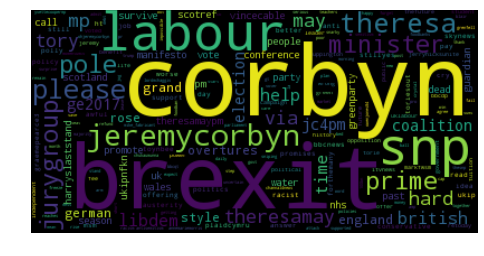

In [186]:
plt.show()


In [187]:
tory_string = " ".join(filtered_list_tories)
wordcloud = WordCloud(collocations=False).generate(tory_string)

In [188]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

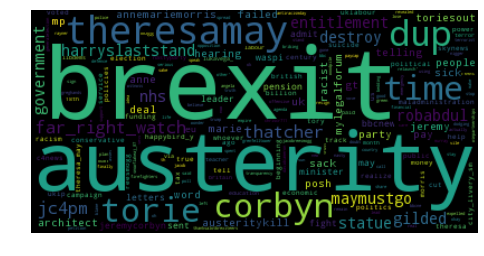

In [189]:
plt.show()

In [131]:

labour_10_df = pd.DataFrame(labour_10)

labour_10_df.rename(columns={0 : 'Words'}, inplace=True)
labour_10_df.rename(columns={1 : 'Frequency'}, inplace=True)
labour_10_df



,Words,Frequency
0,#corbyn,234
1,#snp,231
2,#brexit,211
3,theresa,194
4,please,164
5,prime,155
6,minister?,152
7,pole!,152
8,@jurygroup:,151
9,#jeremycorbyn,126


In [130]:

tory_10_df = pd.DataFrame(tory_10)

tory_10_df.rename(columns={0 : 'Words'}, inplace=True)
tory_10_df.rename(columns={1 : 'Frequency'}, inplace=True)

tory_10_df




,Words,Frequency
0,#brexit,248
1,austerity,201
2,#theresamay,179
3,time,139
4,what's,136
5,@far_right_watch:,119
6,#dup,116
7,#jc4pm,114
8,@harryslaststand:,110
9,entitlement,110


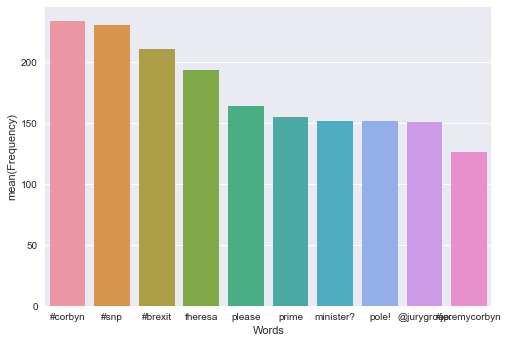

In [192]:

my_plot1 =sns.barplot(x='Words', y='Frequency', data=labour_10_df)
my_plot1.get_figure().savefig('tory1.png', dpi=200)
sns.plt.show()

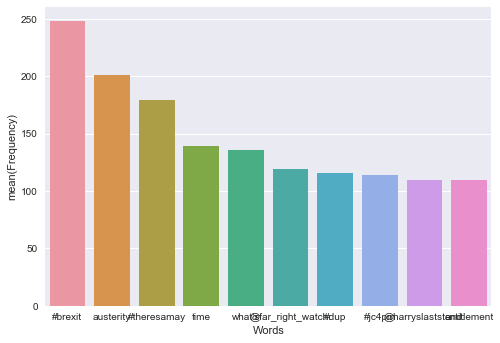

In [183]:
my_plot2 = sns.barplot(x='Words', y='Frequency', data=tory_10_df)
my_plot2.get_figure().savefig('tory.png', dpi=200)
sns.plt.show()

In [ ]:
m

In [138]:
word_imp = words_importances[:15]

In [139]:
word_imp 

[('architect', 1.5499569398950264),
 ('destroys', 1.5499569398950264),
 ('themselves', 1.2006632148835437),
 ('fight', 1.0683357209075928),
 ('dup', 0.7904587148262663),
 ('promises', 0.6909466671870367),
 ('deal', 0.6015983169101166),
 ('admits', 0.6007768277946954),
 ('sent', 0.6007768277946954),
 ('letters', 0.6007768277946954),
 ('true', 0.6006142849809538),
 ('telling', 0.5754726207348946),
 ('anne', 0.5451020646412087),
 ('track', 0.46971389741423936),
 ('offering', 0.4484659655826978)]

In [143]:
word_imp_df = pd.DataFrame(word_imp)

word_imp_df.rename(columns={0 : 'Words'}, inplace=True)
word_imp_df.rename(columns={1 : 'Importance'}, inplace=True)

word_imp_df



,Words,Importance
0,architect,1.549957
1,destroys,1.549957
2,themselves,1.200663
3,fight,1.068336
4,dup,0.790459
5,promises,0.690947
6,deal,0.601598
7,admits,0.600777
8,sent,0.600777
9,letters,0.600777


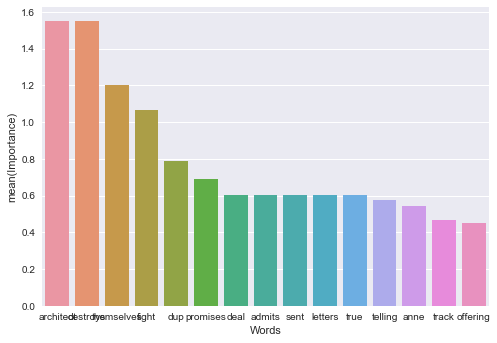

In [195]:

my_plot_3 = sns.barplot(x='Words', y='Importance', data=word_imp_df)
my_plot_3.get_figure().savefig('impo.png', dpi=200)
sns.plt.show()

In [145]:
list1 = [1, 2, 3, 4]
list2 = [2, 3, 4, 9]

set(list1) & set(list2)

{2, 3, 4}

In [168]:
w = counter_labour.most_common(50)
w

most_la = [first for first, second in w]
most_la

['#corbyn',
 '#snp',
 '#brexit',
 'theresa',
 'please',
 'prime',
 'minister?',
 'pole!',
 '@jurygroup:',
 '#jeremycorbyn',
 'via',
 "#labour's",
 '#tory',
 'hard',
 'time',
 '#libdems',
 'help',
 '#theresamay',
 'british',
 'coalition',
 '#ge2017',
 '#jc4pm',
 'overtures',
 'grand',
 '.@theresamaypm',
 'german-style',
 'promote',
 '@ukipnfkn:',
 '@vincecable:',
 'rose…',
 '#wales',
 'corbyn',
 '@jeremycorbyn',
 "won't",
 '@harryslaststand:',
 'election',
 'conference',
 'guardian',
 '#greenparty',
 '#england',
 '#scotland',
 'mps',
 'pm',
 'past',
 'manifesto',
 'dead',
 '#nhs',
 'call',
 'season',
 'survive']

In [169]:
l = counter_tory.most_common(50)




most_to = [first for first, second in l]
most_to

['#brexit',
 'austerity',
 '#theresamay',
 'time',
 "what's",
 '@far_right_watch:',
 '#dup',
 '#jc4pm',
 '@harryslaststand:',
 'entitlement',
 'gilded',
 'statue',
 'thatcher.',
 '#maymustgo',
 'corbyn',
 '@robabdul:',
 'government',
 'jeremy',
 'failed',
 'architect',
 'destroys',
 '#austeritykill…',
 'hearing',
 '#…',
 'telling',
 '...',
 'pay',
 "don't",
 '@mylegalforum:',
 'them!',
 'sick',
 'posh',
 '#nhs',
 '#toriesout',
 'party',
 'brexit',
 'minister',
 'dup',
 'leader',
 'sent',
 '#waspi',
 'pensions',
 'admits',
 'letters',
 '2009',
 'maladministration!',
 '@happybird_y:',
 '#tories:',
 '#annemariemorris',
 'theresa']

In [170]:
most_camon_2 = set(most_la) & set(most_to)
print (most_camon_2)


{'time', 'corbyn', 'theresa', '#theresamay', '@harryslaststand:', '#brexit', '#nhs', '#jc4pm'}


In [ ]:
tory_string = " ".join(most_camon_2)

In [172]:
mot = " ".join(most_camon_2)
wordcloud = WordCloud().generate(mot)


In [173]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

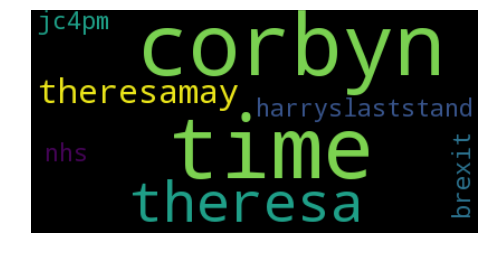

In [174]:
plt.show()